# Distribution Objects

Distribution objects represent probability distributions. You can call `rand` to sample from them and `pdf` to evaluate the probability. They can be found in the `Distributions.jl` and `POMDPTools.jl` packages.

In [1]:
using Distributions: rand, pdf
using POMDPTools: SparseCat # Sparse categorical distribution

In [2]:
d = SparseCat(['a', 'b'], [0.8, 0.2])

                 SparseCat distribution           
       ┌                                        ┐ 
   'a' ┤■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 0.8   
   'b' ┤■■■■■■■■■ 0.2                             
       └                                        ┘ 

In [3]:
[rand(d) for _ in 1:10]

10-element Vector{Char}:
 'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)
 'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)
 'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)
 'b': ASCII/Unicode U+0062 (category Ll: Letter, lowercase)
 'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)
 'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)
 'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)
 'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)
 'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)
 'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)

In [4]:
pdf(d, 'a'), pdf(d, 'b')

(0.8, 0.2)

# POMDPs.jl

In [5]:
using POMDPs
using POMDPModels: SimpleGridWorld
using POMDPTools: render

In [6]:
m = SimpleGridWorld()

SimpleGridWorld((10, 10), Dict{StaticArraysCore.SVector{2, Int64}, Float64}([4, 6] => -5.0, [9, 3] => 10.0, [4, 3] => -10.0, [8, 8] => 3.0), Set(StaticArraysCore.SVector{2, Int64}[[4, 6], [9, 3], [4, 3], [8, 8]]), 0.7, 0.95)

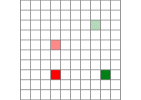

In [7]:
render(m)

# Interacting with POMDPs.jl models

You can access all of the members of the $(S, A, R, T, \gamma, b)$ tuple with the following functions:

In [8]:
states(m)

101-element Vector{StaticArraysCore.SVector{2, Int64}}:
 [1, 1]
 [2, 1]
 [3, 1]
 [4, 1]
 [5, 1]
 [6, 1]
 [7, 1]
 [8, 1]
 [9, 1]
 [10, 1]
 ⋮
 [3, 10]
 [4, 10]
 [5, 10]
 [6, 10]
 [7, 10]
 [8, 10]
 [9, 10]
 [10, 10]
 [-1, -1]

In [9]:
actions(m) # things that begin with a colon (:) are called "Symbols"; they are short interned strings

(:up, :down, :left, :right)

In [10]:
@show reward(m, [4,3], :right) # reward(m, s, a)
@show reward(m, [4,3], :right, [5,3]) # reward(m, s, a, sp)

reward(m, [4, 3], :right) = -10.0
reward(m, [4, 3], :right, [5, 3]) = -10.0


-10.0

In [11]:
transition(m, [1,1], :right)

                      SparseCat distribution           
            ┌                                        ┐ 
     [1, 1] ┤■■■■■■■■■■ 0.2                            
     [1, 2] ┤■■■■■ 0.1                                 
   [-1, -1] ┤ 0                                        
   [-1, -1] ┤ 0                                        
     [2, 1] ┤■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 0.7   
            └                                        ┘ 

In [12]:
[@gen(:sp, :r)(m, [4,3], :right) for _ in 1:10]

10-element Vector{Tuple{StaticArraysCore.SVector{2, Int64}, Float64}}:
 ([-1, -1], -10.0)
 ([-1, -1], -10.0)
 ([-1, -1], -10.0)
 ([-1, -1], -10.0)
 ([-1, -1], -10.0)
 ([-1, -1], -10.0)
 ([-1, -1], -10.0)
 ([-1, -1], -10.0)
 ([-1, -1], -10.0)
 ([-1, -1], -10.0)

In [13]:
discount(m)

0.95

In [14]:
initialstate(m)

POMDPModels.GWUniform((10, 10))

# Running Simulations

In [15]:
using POMDPTools: HistoryRecorder
using POMDPTools: FunctionPolicy

In [16]:
function policy_function(s)
    return rand(actions(m))
end

policy_function (generic function with 1 method)

In [19]:
history = simulate(HistoryRecorder(max_steps=100), m, FunctionPolicy(policy_function))

10-element POMDPTools.Simulators.SimHistory{@NamedTuple{s::StaticArraysCore.SVector{2, Int64}, a::Symbol, sp::StaticArraysCore.SVector{2, Int64}, r::Float64, info::Nothing, t::Int64, action_info::Nothing}, Float64}:
 (s = [1, 4], a = :up, sp = [1, 4], r = 0.0, info = nothing, t = 1, action_info = nothing)
 (s = [1, 4], a = :right, sp = [2, 4], r = 0.0, info = nothing, t = 2, action_info = nothing)
 (s = [2, 4], a = :down, sp = [2, 3], r = 0.0, info = nothing, t = 3, action_info = nothing)
 (s = [2, 3], a = :up, sp = [2, 4], r = 0.0, info = nothing, t = 4, action_info = nothing)
 (s = [2, 4], a = :left, sp = [1, 4], r = 0.0, info = nothing, t = 5, action_info = nothing)
 (s = [1, 4], a = :down, sp = [1, 3], r = 0.0, info = nothing, t = 6, action_info = nothing)
 (s = [1, 3], a = :right, sp = [2, 3], r = 0.0, info = nothing, t = 7, action_info = nothing)
 (s = [2, 3], a = :right, sp = [3, 3], r = 0.0, info = nothing, t = 8, action_info = nothing)
 (s = [3, 3], a = :right, sp = [4, 3], r 

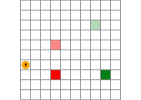

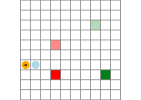

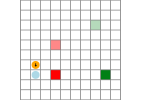

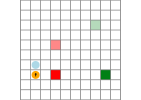

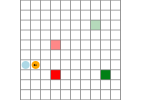

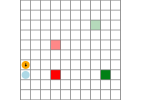

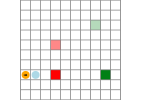

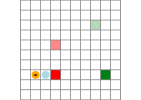

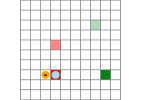

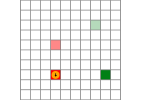

In [20]:
for step in history
    display(render(m, step))
end

Won't quite work:

```julia
using Interact

@manipulate for t in 1:length(history)
    render(m, history[t])
end
```

# Monte Carlo Evaluation

In [21]:
using POMDPTools: RolloutSimulator
using Statistics: mean, std
using Plots: histogram
using LaTeXStrings

In [22]:
function policy_function(s)
    if s[1] < 9
        return :right
    elseif s[2] > 3
        return :down
    else
        return :left
    end
end

p = FunctionPolicy(policy_function)

FunctionPolicy{typeof(policy_function)}(policy_function)

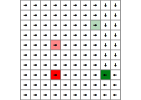

In [23]:
render(m, policy=FunctionPolicy(policy_function))

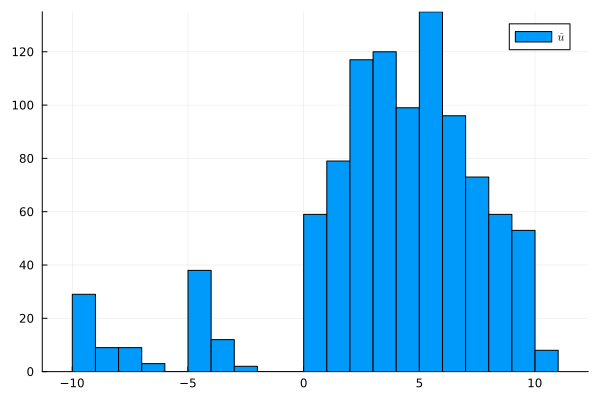

Mean reward (± 3 sem): 3.652828513905339 ± 0.4033752947685047


In [30]:
m_sims=1000
function mc_evaluate(m_simulations=m_sims)
    return [simulate(RolloutSimulator(max_steps=100), m, FunctionPolicy(policy_function)) for _ in 1:m_simulations]
end

uhats = mc_evaluate()

display(histogram(uhats, label=L"\hat{u}"))
println("Mean reward (± 3 sem): $(mean(uhats)) ± $(3*std(uhats)/sqrt(m_sims))") 

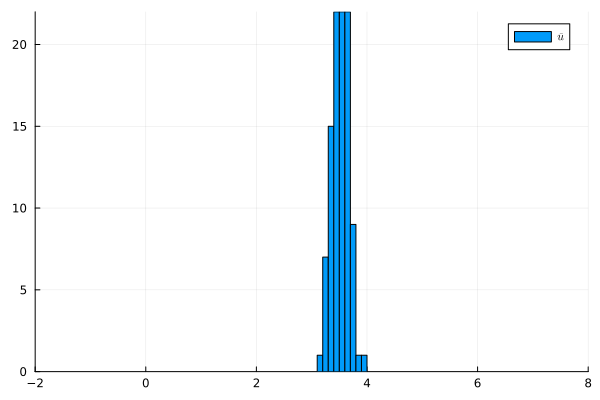

In [31]:
ubars = [mean(mc_evaluate(m_sims)) for _ in 1:100]
display(histogram(ubars, label=L"\bar{u}", xlim=(-2,8)))

# Value-Based Evaluation

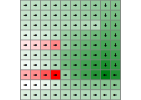

In [33]:
import POMDPTools
using LinearAlgebra: I

T_pi = POMDPTools.Policies.policy_transition_matrix(m, FunctionPolicy(policy_function))
R_pi = POMDPTools.Policies. policy_reward_vector(m, FunctionPolicy(policy_function))
U_pi = (I - discount(m)*T_pi)\R_pi

render(m, policy=FunctionPolicy(policy_function), color=U_pi)

In [34]:
b = initialstate(m)
U_pi_initial_state = 0.0
for s in support(b)
    U_pi_initial_state += pdf(b, s)*U_pi[stateindex(m, s)]
end
U_pi_initial_state # Compare to meain of MC evaluation above

3.523789784801354

.
 
.
 
.
 
.
 
.
 
.
 
.
 
.
 
Extra text is here to prevent bad scrolling when the plot resets.